# 2.3.2 Complex machine learning models - sklearn - random forest
# Top 3 - BELGRADE
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. File directory, read the data
#### 3. Create dictionary lists for outcome labels
#### 4. Load and split data into training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        - Belgrade
---------------------------------------------------------------------------------------------------------------------------
## 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. File directory, read the data

In [3]:
path = r'climatewins-ml'

In [4]:
bel = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'belgrade-subset.csv'))
bel

BELGRADE_cloud_cover  BELGRADE_global_radiation  BELGRADE_humidity  \
0                         1                       0.88               0.81   
1                         6                       0.25               0.84   
2                         6                       0.67               0.77   
3                         8                       0.25               0.93   
4                         8                       0.25               0.99   
...                     ...                        ...                ...   
22945                     2                       1.57               0.68   
22946                     0                       1.57               0.68   
22947                     2                       1.57               0.68   
22948                     1                       1.57               0.68   
22949                     4                       1.57               0.68   

       BELGRADE_precipitation  BELGRADE_pressure  BELGRADE_sunshine  \
0                        0.00             1.0195                7.0   
1                        0.00             1.0172                0.0   
2                        0.00             1.0179                3.5   
3                        0.00             1.0268                0.0   
4                        0.06             1.0286                0.0   
...                       ...                ...                ...   
22945                    0.18             1.0278                5.7   
22946                    0.18             1.0295                5.7   
22947                    0.18             1.0278                5.7   
22948                    0.18             1.0238                5.7   
22949                    0.18             1.0235                5.7   

       BELGRADE_temp_max  BELGRADE_temp_mean  BELGRADE_temp_min  
0                    7.9                 3.7               -0.9  
1                    4.4                 2.9                2.2  
2                    6.4                 3.1               -0.5  
3                    3.0                 2.0               -2.0  
4                    2.8                 2.0                0.7  
...                  ...                 ...                ...  
22945               24.4                18.2               12.1  
22946               21.2                15.9               10.6  
22947               18.2                13.4                8.6  
22948               20.9                15.0                9.1  
22949               18.4                14.4               10.4  

[22950 rows x 9 columns]

In [5]:
bel_outcomes = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'belgrade-outcomes-subset.csv'))
bel_outcomes

BELGRADE_pleasant_weather
0                              0
1                              0
2                              0
3                              0
4                              0
...                          ...
22945                          0
22946                          0
22947                          0
22948                          0
22949                          0

[22950 rows x 1 columns]

---------------------------------------------------------------------------------------------------------------------------
## 3. Create dictionary lists for outcome labels

In [6]:
# Print the BELGRADE columns
bel_cols = bel.columns

In [7]:
# Create a dictionary to map binary labels to their corresponding categories
bel_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

---------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data into training/test sets

In [8]:
# Our data doesnt need to be reshaped
X = bel

X.shape

(22950, 9)

In [9]:
y = bel_outcomes

y.shape

(22950, 1)

In [10]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [11]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [13]:
X_train

BELGRADE_cloud_cover  BELGRADE_global_radiation  BELGRADE_humidity  \
12262                     3                       2.76               0.49   
9334                      0                       3.38               0.48   
7100                      2                       2.73               0.68   
12030                     7                       0.39               0.77   
2958                      2                       1.01               0.76   
...                     ...                        ...                ...   
11964                     5                       1.50               0.60   
21575                     7                       1.57               0.68   
5390                      3                       1.81               0.62   
860                       4                       2.43               0.62   
15795                     4                       1.89               0.43   

       BELGRADE_precipitation  BELGRADE_pressure  BELGRADE_sunshine  \
12262                    0.00             1.0182               10.1   
9334                     0.00             1.0259               13.7   
7100                     0.38             1.0174               10.4   
12030                    0.16             1.0092                0.6   
2958                     0.00             1.0131                5.1   
...                       ...                ...                ...   
11964                    0.00             1.0094                6.1   
21575                    0.20             1.0108                5.7   
5390                     0.00             1.0183                7.9   
860                      0.38             1.0121                6.7   
15795                    0.00             1.0139                6.4   

       BELGRADE_temp_max  BELGRADE_temp_mean  BELGRADE_temp_min  
12262               28.3                23.0               13.8  
9334                24.0                19.0               14.0  
7100                28.3                22.7               18.5  
12030                7.4                 5.0                0.7  
2958                 8.4                 4.8                2.0  
...                  ...                 ...                ...  
11964               22.3                16.7               10.9  
21575               -1.3                -2.4               -3.5  
5390                21.0                13.8                7.6  
860                 25.6                20.6               17.0  
15795               22.2                15.2               10.9  

[18360 rows x 9 columns]

In [14]:
y_train

BELGRADE_pleasant_weather
12262                          1
9334                           1
7100                           0
12030                          0
2958                           0
...                          ...
11964                          1
21575                          0
5390                           1
860                            0
15795                          1

[18360 rows x 1 columns]

In [15]:
print(X_test.shape)
X_test

(4590, 9)


BELGRADE_cloud_cover  BELGRADE_global_radiation  BELGRADE_humidity  \
19955                     4                       2.68               0.57   
7729                      3                       1.63               0.59   
10815                     1                       2.65               0.60   
3125                      8                       0.44               0.94   
18985                     5                       0.65               0.72   
...                     ...                        ...                ...   
15982                     5                       1.49               0.65   
18660                     8                       0.33               0.88   
705                       5                       0.60               0.65   
12350                     2                       1.46               0.65   
8604                      0                       2.98               0.49   

       BELGRADE_precipitation  BELGRADE_pressure  BELGRADE_sunshine  \
19955                    0.00             1.0131               11.2   
7729                     0.00             1.0256                6.5   
10815                    0.00             1.0118               11.1   
3125                     3.12             1.0184                0.0   
18985                    0.16             1.0221                3.5   
...                       ...                ...                ...   
15982                    0.73             1.0068                6.0   
18660                    0.01             1.0300                0.0   
705                      0.63             1.0103                2.5   
12350                    0.00             1.0177                8.9   
8604                     0.00             1.0109               12.7   

       BELGRADE_temp_max  BELGRADE_temp_mean  BELGRADE_temp_min  
19955               29.6                24.7               19.0  
7729                 5.3                 0.3               -2.1  
10815               29.3                23.7               16.3  
3125                15.4                12.4               11.7  
18985                4.4                 1.5               -2.9  
...                  ...                 ...                ...  
15982               29.6                20.9               17.4  
18660               -6.5                -7.6               -8.2  
705                 15.9                12.7                7.8  
12350               23.4                14.7               11.8  
8604                30.2                25.1               15.6  

[4590 rows x 9 columns]

In [16]:
print(y_test.shape)
y_test

(4590, 1)


BELGRADE_pleasant_weather
19955                          1
7729                           0
10815                          1
3125                           0
18985                          0
...                          ...
15982                          0
18660                          0
705                            0
12350                          1
8604                           1

[4590 rows x 1 columns]

---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [18]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


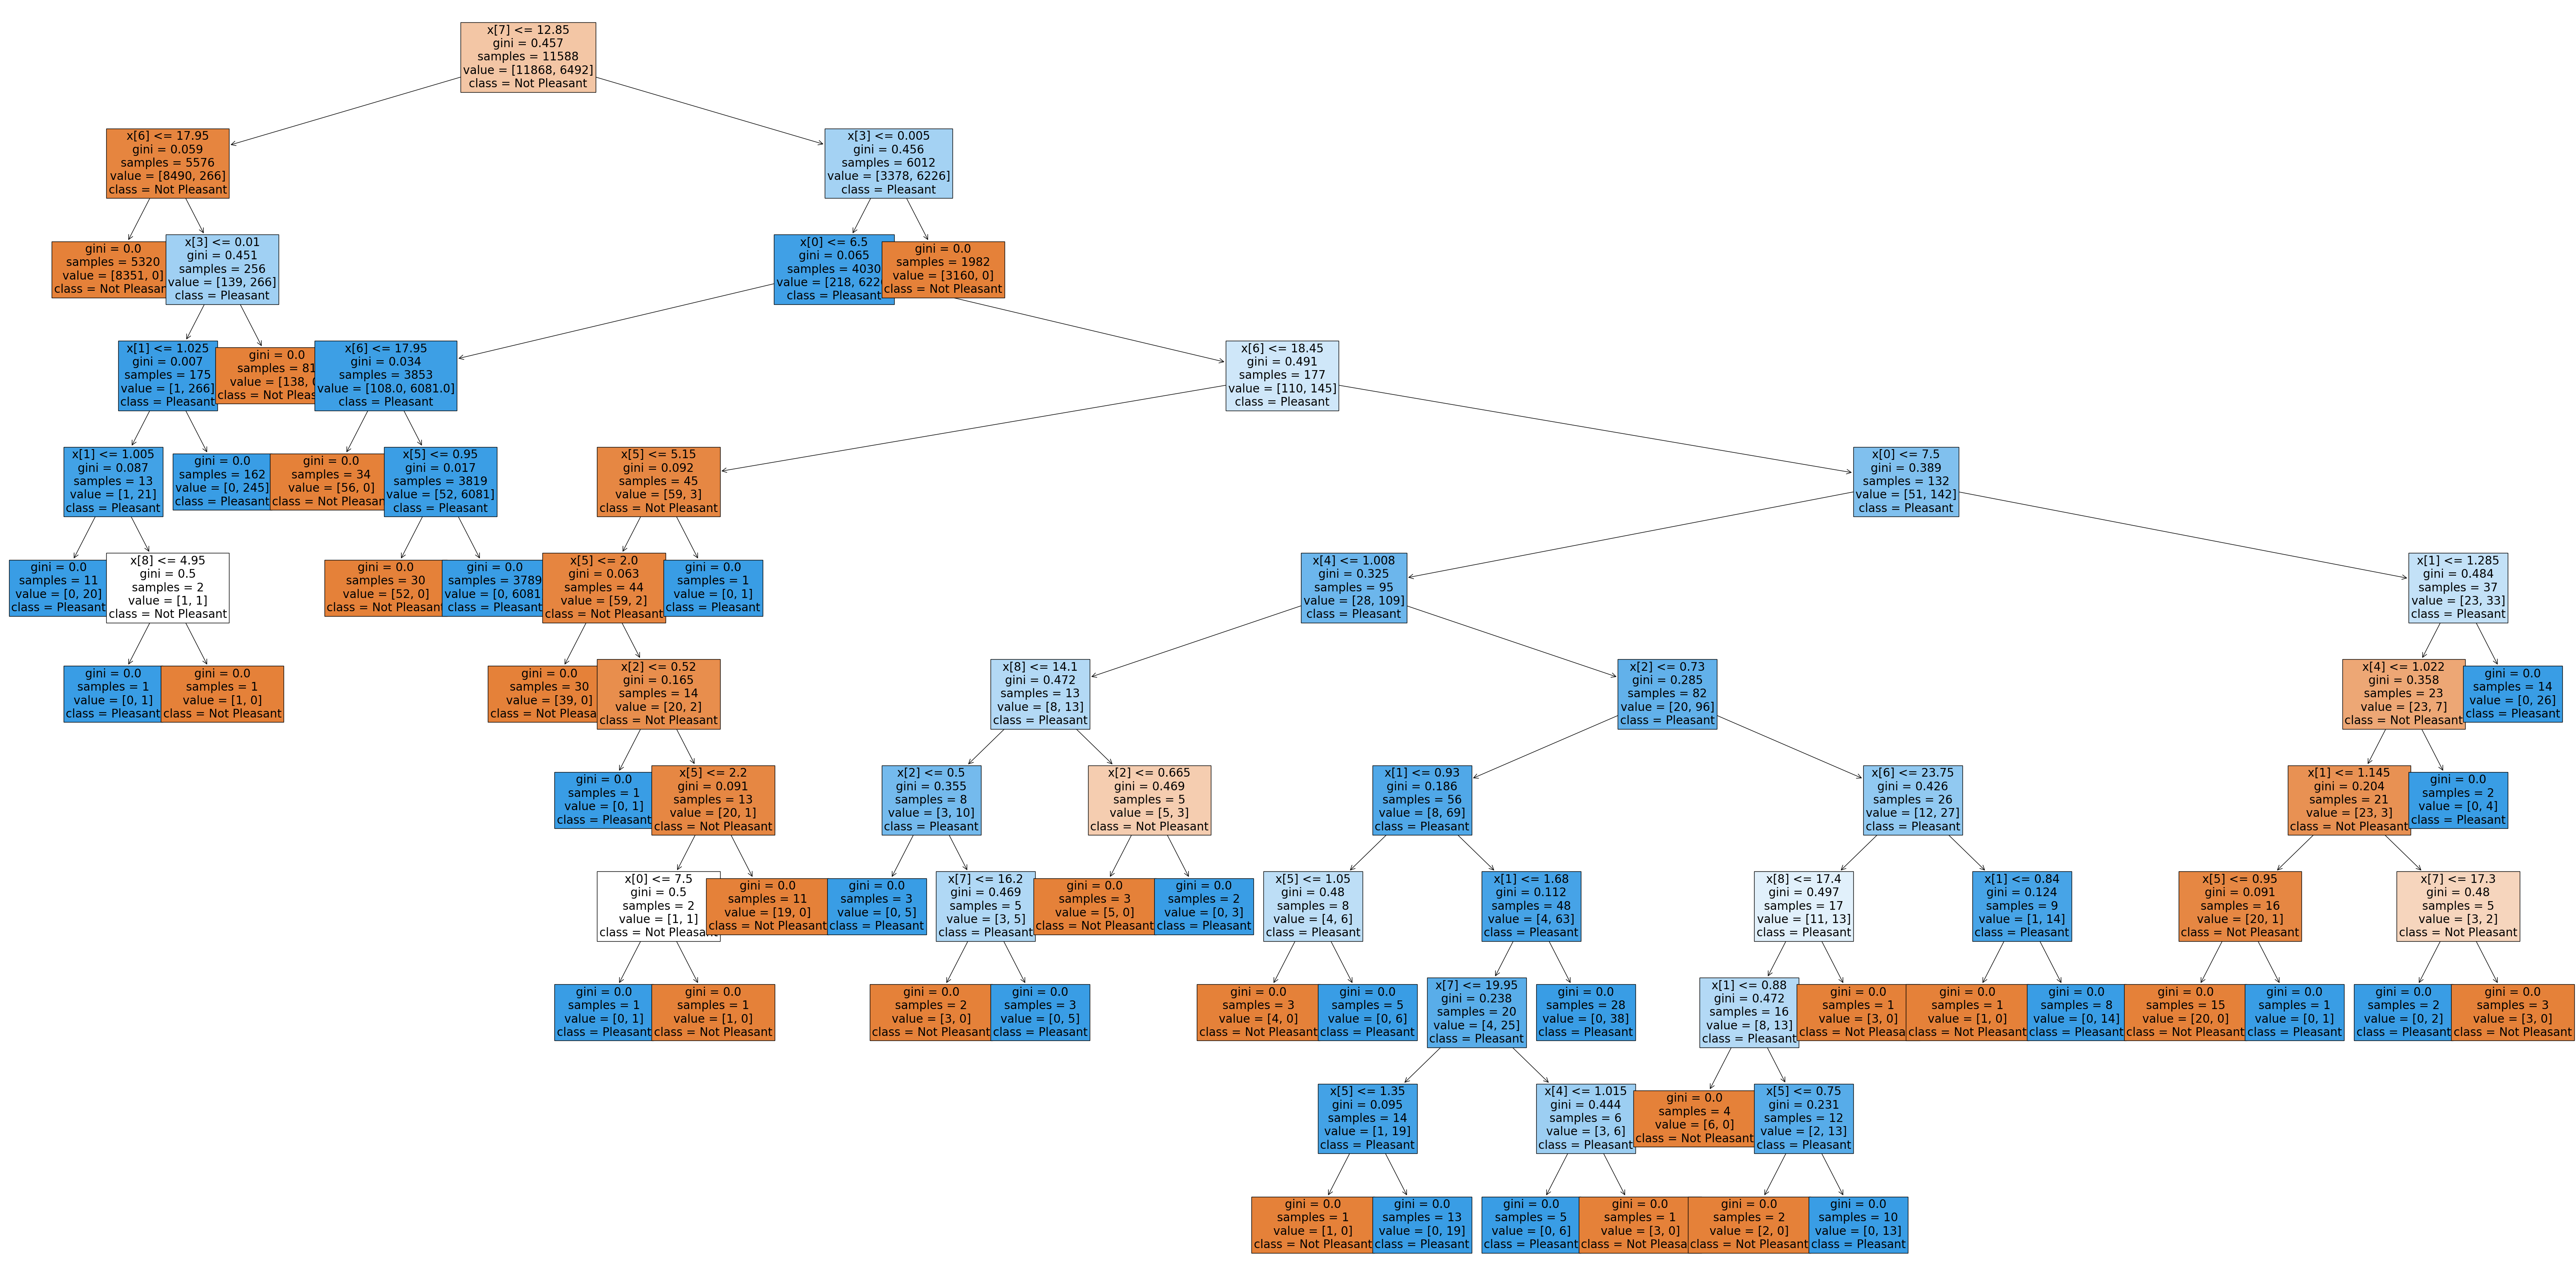

In [20]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=bel_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

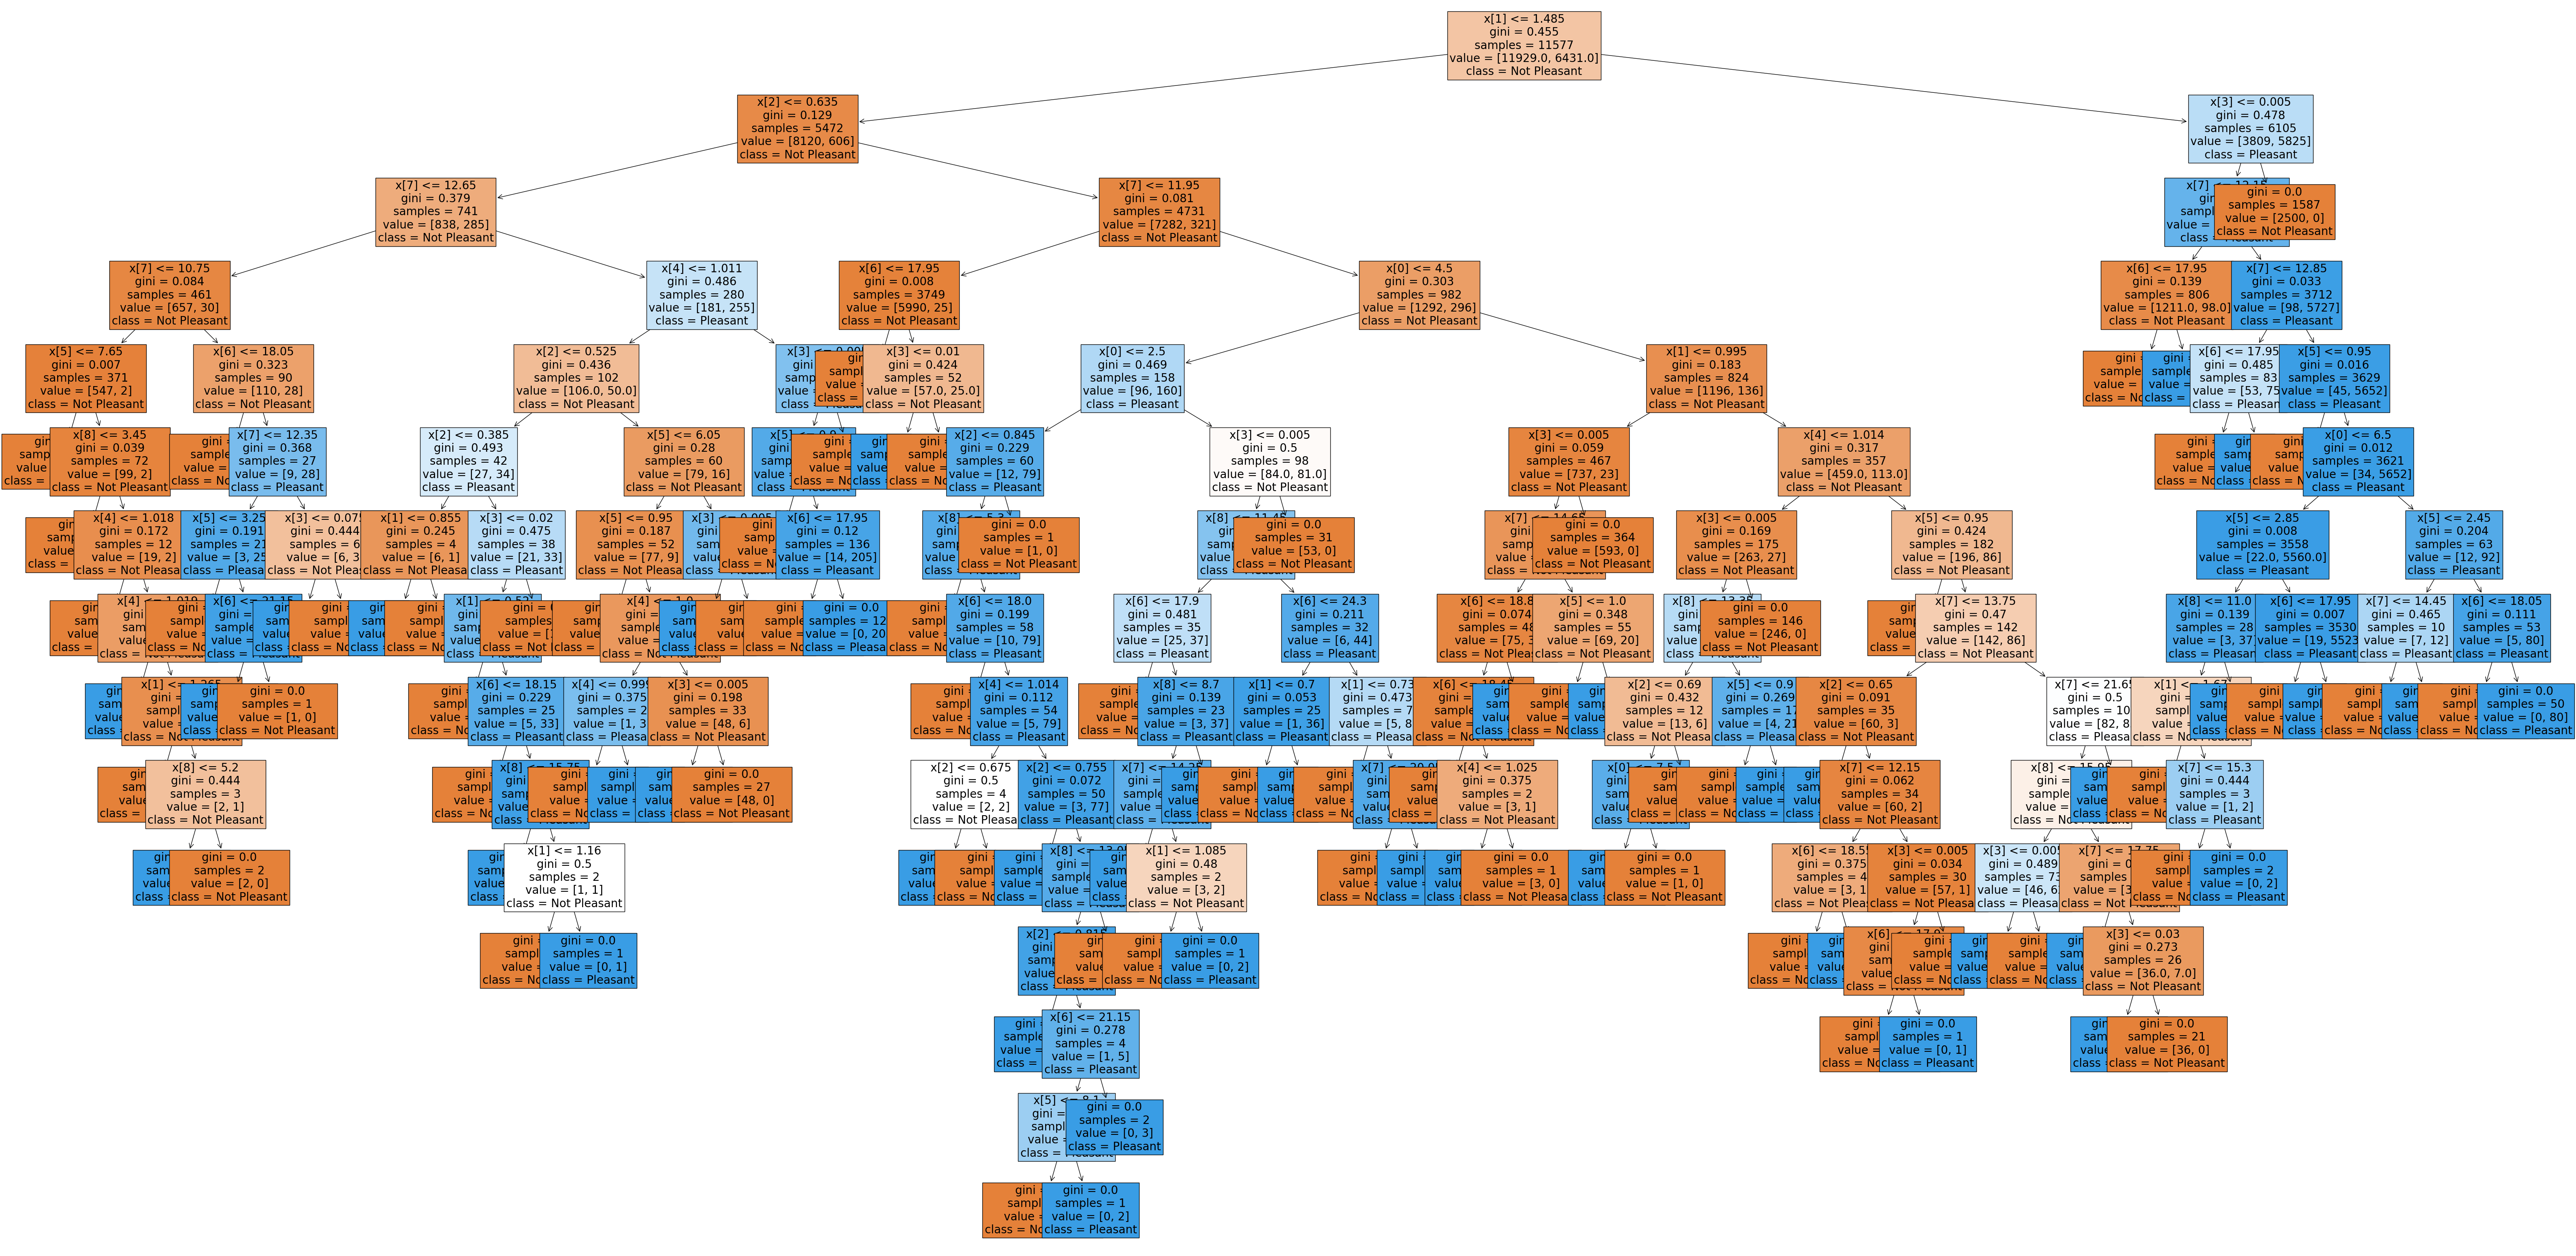

In [21]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=bel_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis¶
    - Belgrade

In [22]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04836838, 0.03306399, 0.00809716, 0.36406157, 0.00611499,
       0.07364582, 0.29167969, 0.14879634, 0.02617206])

In [23]:
np.set_printoptions(threshold=1000)

In [24]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.04836838, 0.03306399, 0.00809716, 0.36406157, 0.00611499,
         0.07364582, 0.29167969, 0.14879634, 0.02617206]]])

In [25]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04836838, 0.03306399, 0.00809716, 0.36406157, 0.00611499,
       0.07364582, 0.29167969, 0.14879634, 0.02617206])

In [27]:
important = pd.Series(sumarray, index = bel_cols) #.sort_values(ascending = False)
important

BELGRADE_cloud_cover         0.048368
BELGRADE_global_radiation    0.033064
BELGRADE_humidity            0.008097
BELGRADE_precipitation       0.364062
BELGRADE_pressure            0.006115
BELGRADE_sunshine            0.073646
BELGRADE_temp_max            0.291680
BELGRADE_temp_mean           0.148796
BELGRADE_temp_min            0.026172
dtype: float64

Index(['BELGRADE_cloud_cover', 'BELGRADE_global_radiation',
       'BELGRADE_humidity', 'BELGRADE_precipitation', 'BELGRADE_pressure',
       'BELGRADE_sunshine', 'BELGRADE_temp_max', 'BELGRADE_temp_mean',
       'BELGRADE_temp_min'],
      dtype='object')


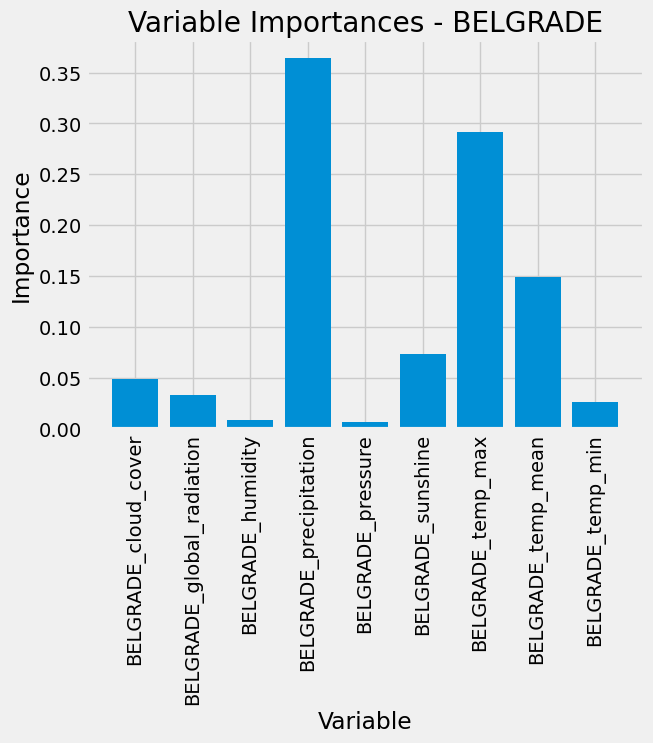

In [28]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(bel_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, bel_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - BELGRADE');

- **Notes:** Top features of importances are for BELGRADE weather station are:

        1. Precipitation
        2. Temperature max
        3. Temperature mean

---------------------------------------------------------------------------------------------------------------------------
